<a href="https://colab.research.google.com/github/ywateba/fds_2023_project/blob/main/fds_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter
import seaborn as sns

warnings.filterwarnings('ignore')


## 1.1 Import Data

In [2]:
# Directory containing all datasets
directory = './dataset_nba'

# List of CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Dictionary to memorize DataFrames
dataframes = {}

# Importa i file CSV e assegna loro nomi basati sul titolo del file
for file_name in csv_files:
    # Estrai il titolo del file (senza l'estensione .csv)
    title = os.path.splitext(file_name)[0]
    
    # Costruisci il percorso completo del file
    file_path = os.path.join(directory, file_name)
    
    # Leggi il file CSV in un DataFrame e assegna il titolo come chiave
    dataframes[title] = pd.read_csv(file_path)
    dataframes[title]['Season'] = str(title[:4])
    

# Ora puoi accedere ai tuoi DataFrame utilizzando i titoli assegnati ai file
# Ad esempio, per accedere al DataFrame del file 'file1.csv':
dataframes['2018-rookies']


,Rk,Player,Debut,Age,Yrs,G,MPTOT,FG,FGA,3P,...,PTSTOT,FG%,3P%,FT%,MP,PTS,TRB,AST,ID,Season
0,1,Bam Adebayo,Oct 18 '17 MIA @ ORL,20,1,69,1368,174,340,0,...,477,0.512,0.000,0.721,19.8,6.9,5.5,1.5,adebaba01,2018
1,2,Jarrett Allen,Oct 20 '17 BRK vs. ORL,19,1,72,1441,234,397,5,...,587,0.589,0.333,0.776,20.0,8.2,5.4,0.7,allenja01,2018
2,3,Kadeem Allen,Dec 11 '17 BOS @ CHI,25,1,18,107,6,22,0,...,19,0.273,0.000,0.778,5.9,1.1,0.6,0.7,allenka01,2018
3,4,Ike Anigbogu,Oct 20 '17 IND vs. POR,19,1,11,30,4,9,0,...,13,0.444,NaN,0.833,2.7,1.2,0.8,0.0,anigbik01,2018
4,5,OG Anunoby,Oct 19 '17 TOR vs. CHI,20,1,74,1481,163,346,73,...,438,0.471,0.371,0.629,20.0,5.9,2.5,0.7,anunoog01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Matt Williams,Dec 23 '17 MIA vs. NOP,24,1,3,11,2,6,1,...,5,0.333,0.200,NaN,3.7,1.7,0.3,0.0,willima05,2018
116,117,D.J. Wilson,Oct 20 '17 MIL vs. CLE,21,1,22,71,9,16,2,...,21,0.563,0.400,0.500,3.2,1.0,0.5,0.1,wilsodj01,2018
117,118,Jamil Wilson,Nov 20 '17 LAC @ NYK,27,1,15,274,38,81,27,...,105,0.469,0.429,0.500,18.3,7.0,2.1,0.7,wilsoja02,2018
118,119,Guerschon Yabusele,Oct 20 '17 BOS @ PHI,22,1,33,235,26,61,12,...,79,0.426,0.324,0.682,7.1,2.4,1.6,0.5,yabusgu01,2018


In [3]:
rookies_id = dict()
for year in range(2018, 2024):
    rookies_id[year] = dataframes.get(f'{year}-rookies')['ID'].tolist()

rookies_id

{2018: ['adebaba01',
  'allenja01',
  'allenka01',
  'anigbik01',
  'anunoog01',
  'arcidry01',
  'artisja01',
  'bacondw01',
  'balllo01',
  'belljo01',
  'birchkh01',
  'birdja01',
  'blakean01',
  'bogdabo01',
  'bouchch01',
  'bradlto01',
  'brookdi01',
  'brownst02',
  'bryanth01',
  'carusal01',
  'cavanty01',
  'clavegi01',
  'clevean01',
  'collijo01',
  'colliza01',
  'colliky01',
  'cookech01',
  'costema01',
  'craigto01',
  'dorsety01',
  'dotsoda01',
  'doylemi01',
  'doziepj01',
  'evansja01',
  'fergute01',
  'foxde01',
  'fultzma01',
  'grayjo01',
  'hamilda02',
  'harrish01',
  'hartjo01',
  'hayesni01',
  'hearnre01',
  'henrymy01',
  'hicksis01',
  'hollajo02',
  'huntevi01',
  'ingraan01',
  'isaacjo01',
  'iwundwe01',
  'jacksaa01',
  'jacksjo02',
  'jacksju01',
  'jamesmi02',
  'johnsda04',
  'johnsom01',
  'jonesja04',
  'kennalu01',
  'klebima01',
  'korkmfu01',
  'kornelu01',
  'kuzmaky01',
  'leaftj01',
  'leeda03',
  'lemonwa01',
  'lydonty01',
  'magetjo01',

In [4]:
df_final = pd.DataFrame()

for year_rookie in range(2018, 2024):
    for year_player in range(year_rookie, 2024):
        df_att = dataframes.get(f'{year_player}-players')
        df_att = df_att[df_att['ID'].isin(rookies_id[year_rookie])]
        df_final = pd.concat([df_att, df_final], ignore_index=True)

df_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


Eliminiamo le righe relative ai giocatori che hanno cambiato squadra nell'arco della stagione, mantenendo solo la riga relativa alle statistiche delle 2 o più squadre in cui ha militato.

In [5]:
condition = (df_final['Tm'] != 'TOT') & df_final.duplicated(subset=['ID', 'Season'], keep=False)

# Applica le condizioni utilizzando il metodo loc
df = df_final.loc[~condition]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


In [6]:
df_sorted = df.sort_values(by=['ID', 'Season'])
pd.set_option('display.max_rows', None)

df_sorted['Season'] = df_sorted['Season'] = df_sorted['Season'].astype(int)
df_sorted.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1343,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01,2019
1172,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01,2021
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020
1582,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01,2021
1514,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01,2022


Only first 3 seasons.

In [7]:
pd.set_option('display.max_rows', None)
df = df_sorted.groupby('Player').head(3)
season_counts = df.groupby('Player')['Season'].count()
season_counts
selected_players = season_counts[season_counts >= 3].index
season_counts
selected_rows = df[df['Player'].isin(selected_players)]
df_final = selected_rows
df_final.head(30)
# Counter(df_final['Player'].tolist())

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020
795,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,2.8,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01,2021
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.5,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019


Let's add the information about the year.

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 496 to 1735
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      792 non-null    int64  
 1   Player  792 non-null    object 
 2   Pos     792 non-null    object 
 3   Age     792 non-null    int64  
 4   Tm      792 non-null    object 
 5   G       792 non-null    int64  
 6   GS      792 non-null    int64  
 7   MP      792 non-null    float64
 8   FG      792 non-null    float64
 9   FGA     792 non-null    float64
 10  FG%     791 non-null    float64
 11  3P      792 non-null    float64
 12  3PA     792 non-null    float64
 13  3P%     749 non-null    float64
 14  2P      792 non-null    float64
 15  2PA     792 non-null    float64
 16  2P%     788 non-null    float64
 17  eFG%    791 non-null    float64
 18  FT      792 non-null    float64
 19  FTA     792 non-null    float64
 20  FT%     763 non-null    float64
 21  ORB     792 non-null    float64
 22  DRB 

In [16]:
years = [i % 3 + 1 for i in range(df_final.shape[0])]
df_final['Year'] = years
df_final.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season,Year
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021,1
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022,2
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023,3
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018,1
1736,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01,2019,2
1663,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01,2020,3
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020,1
795,7,Nickeil Alexander-Walker,SG,22,NOP,46,13,21.9,4.2,10.0,...,3.1,2.2,1.0,0.5,1.5,1.9,11.0,alexani01,2021,2
683,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,2.9,2.4,0.7,0.4,1.4,1.6,10.6,alexani01,2022,3
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019,1


Modifica ruoli

In [24]:
df_final['Pos'].replace('SG-SF', 'SG', inplace=True)
df_final['Pos'].replace('SF-SG', 'SF', inplace=True)
df_final['Pos'].replace('SG-PG', 'SG', inplace=True)
df_final['Pos'].replace('PF-SF', 'PF', inplace=True)
df_final['Pos'].replace('C-PF', 'C', inplace=True)
df_final['Pos'].replace('SF-PF', 'SF', inplace=True)
df_final['Pos'].replace('PF-C', 'PF', inplace=True)

Counter(df_final['Pos'].tolist())

Counter({'SG': 204, 'PF': 162, 'SF': 161, 'PG': 152, 'C': 113})

## 1.2 Analyze data

Let's start analyzing 

In [25]:
## DATASET SOLO DEL PRIMO ANNO DI OGNI ROOKIE

first_year = df_final[df_final['Year'] == 1]
first_year.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season,Year
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021,1
1830,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,5.5,1.5,0.5,0.6,1.0,2.0,6.9,adebaba01,2018,1
915,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01,2020,1
1347,10,Grayson Allen,SG,23,UTA,38,2,10.9,1.8,4.7,...,0.6,0.7,0.2,0.2,0.9,1.2,5.6,allengr01,2019,1
1831,8,Jarrett Allen,C,19,BRK,72,31,20.0,3.3,5.5,...,5.4,0.7,0.4,1.2,1.1,2.0,8.2,allenja01,2018,1
1832,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.6,0.7,0.2,0.1,0.5,0.8,1.1,allenka01,2018,1
1348,19,Kostas Antetokounmpo,PF,21,DAL,2,0,5.5,0.0,1.5,...,0.5,0.0,1.0,0.0,0.5,0.0,1.0,antetko01,2019,1
498,16,Cole Anthony,PG,20,ORL,47,34,27.1,4.7,11.7,...,4.7,4.1,0.6,0.4,2.3,2.1,12.9,anthoco01,2021,1
1834,18,OG Anunoby,SF,20,TOR,74,62,20.0,2.2,4.7,...,2.5,0.7,0.7,0.2,0.6,1.8,5.9,anunoog01,2018,1
1835,19,Ryan Arcidiacono,PG,23,CHI,24,0,12.7,0.7,1.7,...,1.0,1.5,0.5,0.0,0.5,0.8,2.0,arcidry01,2018,1


Punti, rimbalzi e assist medi per ogni anno.

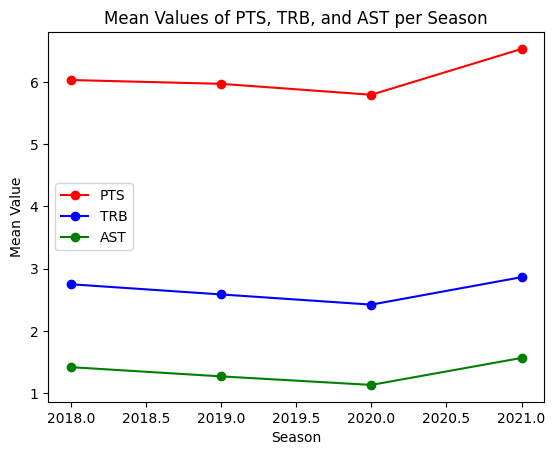

In [26]:
PTS_per_season = first_year.groupby('Season')['PTS'].mean()
TRB_per_season = first_year.groupby('Season')['TRB'].mean()
AST_per_season = first_year.groupby('Season')['AST'].mean()
fig, ax1 = plt.subplots()

# Plot the PTS data as a line with red color
ax1.plot(PTS_per_season.index, PTS_per_season.values, color='red', label='PTS', marker = 'o')

# Plot the TRB data as a line with blue color
ax1.plot(TRB_per_season.index, TRB_per_season.values, color='blue', label='TRB', marker = 'o')

# Plot the AST data as a line with green color
ax1.plot(AST_per_season.index, AST_per_season.values, color='green', label='AST', marker = 'o')

# Add a legend
ax1.legend(loc='center left')

# Set the x-axis label and y-axis label
ax1.set_xlabel('Season')
ax1.set_ylabel('Mean Value')

# Set the title of the graph
ax1.set_title('Mean Values of PTS, TRB, and AST per Season')
plt.show()

# pt assist rimbalzi

Analyze positions

In [27]:
Counter(first_year['Pos'].tolist())

Counter({'SG': 69, 'PF': 60, 'SF': 52, 'PG': 51, 'C': 32})

In [29]:
list_roles = first_year['Pos'].unique().tolist() # estraggo le differenti posizioni

PTS_per_season_pos = first_year.groupby(['Season', 'Pos'])['PTS'].mean()
TRB_per_season_pos = first_year.groupby(['Season', 'Pos'])['TRB'].mean()
AST_per_season_pos = first_year.groupby(['Season', 'Pos'])['AST'].mean()

PTS_per_season_pos

Season  Pos
2018    C      4.400000
        PF     6.381818
        PG     6.294118
        SF     6.200000
        SG     6.482353
2019    C      7.900000
        PF     5.472727
        PG     7.007692
        SF     4.966667
        SG     5.529412
2020    C      4.527273
        PF     5.852174
        PG     7.750000
        SF     6.083333
        SG     5.454167
2021    C      4.000000
        PF     4.746667
        PG     7.923077
        SF     7.340000
        SG     7.509091
Name: PTS, dtype: float64

## Correlation Matrix

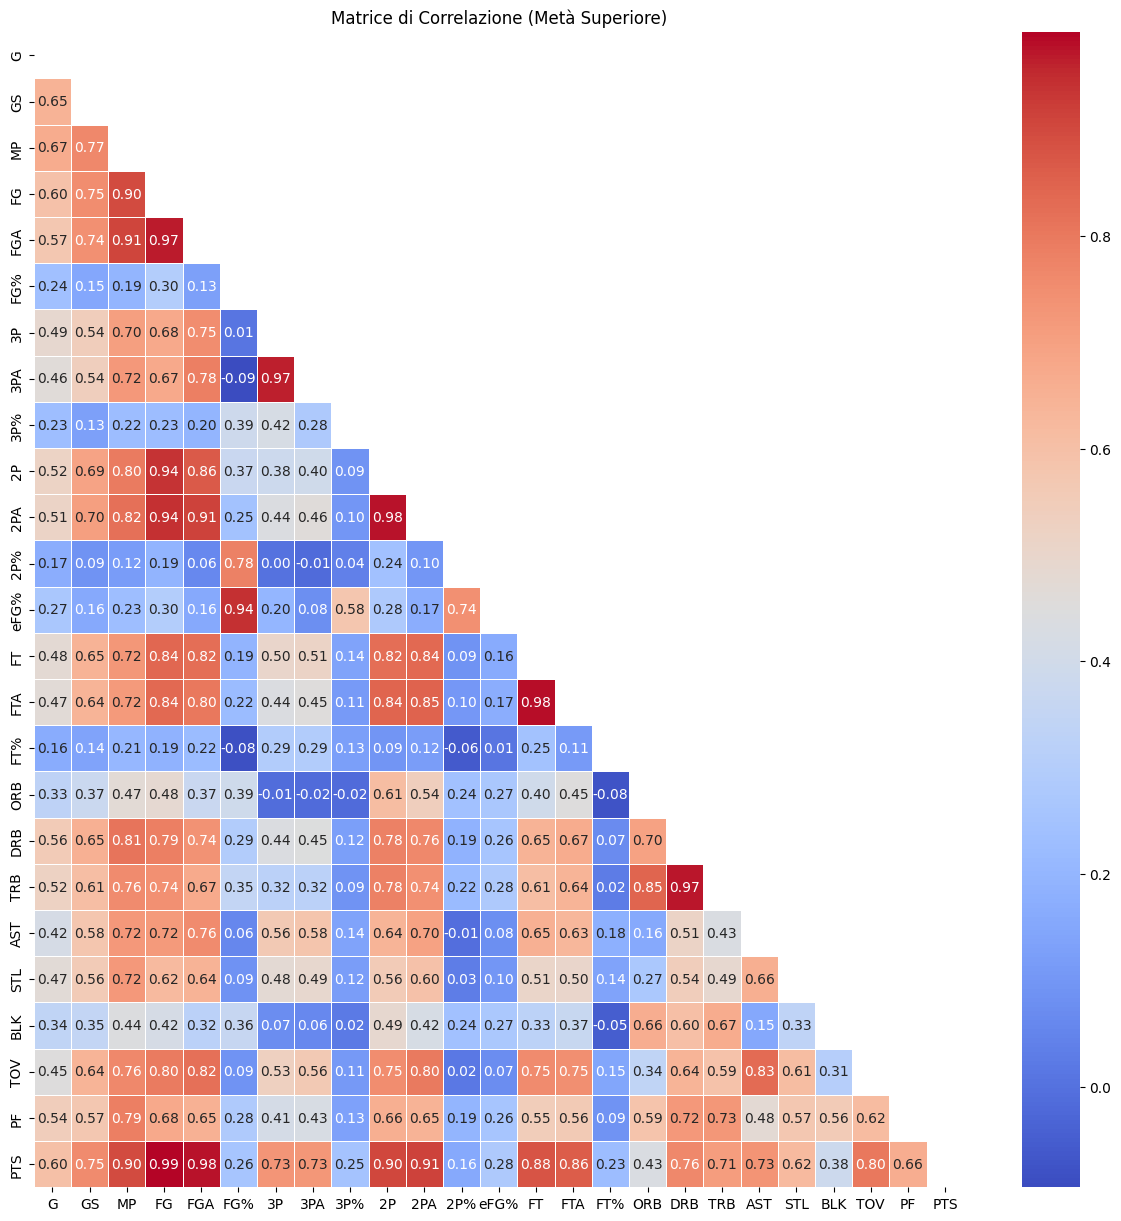

In [30]:


# Creazione di un DataFrame con i tuoi dati
# Supponendo che i tuoi dati siano già presenti in un DataFrame chiamato 'df'

# Creazione di una sottoinsieme del DataFrame con le colonne di interesse
columns_of_interest = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
                        'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

subset_df = df[columns_of_interest]

# Calcolo della matrice di correlazione
correlation_matrix = subset_df.corr()

# Creazione di una matrice con la stessa forma di quella di correlazione ma con valori NaN
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Creazione di un heatmap per visualizzare solo la metà superiore della matrice di correlazione
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title("Matrice di Correlazione")
plt.show()
